<a href="https://www.kaggle.com/code/mukund604/chest-x-ray-images-pneumonia?scriptVersionId=181685833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/mukund604/chest-x-ray-images-pneumonia?scriptVersionId=181436637" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **98% Accuracy - Chest X-ray Images (Pneumonia or Normal) Classification using CNN**
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs13369-021-06127-z/MediaObjects/13369_2021_6127_Fig2_HTML.png)


   **98% Accuracy in Predicting if the X-ray is of a Pneumonia Patient or not**

> # Importing and labeling the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2


warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
Train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
Test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
Val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/'


Categories = os.listdir(Train_dir)
print("Train",Categories, "0 is Pneumonia and 1 is Normal")



img_size = 150
def create_data(dir):
    data = []
    for d in os.listdir(dir):
        path_dir = os.path.join(dir,d)
        class_num = Categories.index(d)
        for file in os.listdir(path_dir):
            img_array = cv2.imread(os.path.join(path_dir,file), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_img_array, class_num])
    return data
training_data = create_data(Train_dir)
testing_data = create_data(Test_dir)
validation_data = create_data(Val_dir)

Train ['PNEUMONIA', 'NORMAL'] 0 is Pneumonia and 1 is Normal


> # Shuffling the data so that random samples are provided to the model while training

In [2]:
import random 

random.shuffle(training_data)

X_train = []
y_train = []

for features,labels in training_data:
    X_train.append(features)
    y_train.append(labels)
print(X_train[:1], y_train[:1])

[array([[  0,   0,   7, ...,   8,  10,  13],

       [  0,   0,  18, ...,  24,  21,  18],

       [  0,   3,  30, ...,  34,  29,  28],

       ...,

       [  2,   2,   0, ...,  44,  35,  29],

       [  1,   2,   0, ...,  41,  33, 153],

       [  6,   2,   0, ...,  28,  45,  33]], dtype=uint8)] [0]


> # Plotting a few sample images

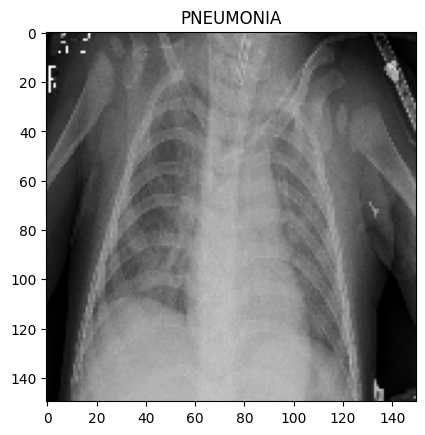

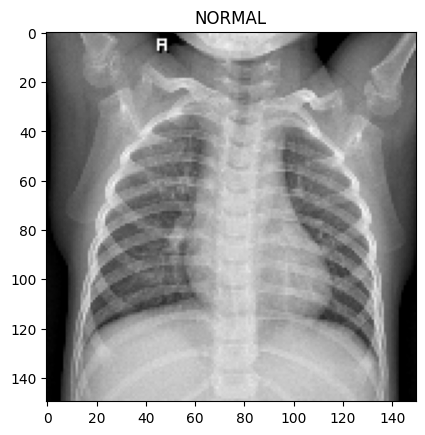

In [3]:
import matplotlib.pyplot as plt

for img,label in zip(X_train[:2], y_train[:2]):
    plt.imshow(img, cmap='gray')
    plt.title(Categories[label])
    plt.show()

> # Reshaping and converting X and y to numpy arrays for Training 

In [4]:
from keras.utils import to_categorical

X = np.array(X_train).reshape(-1, img_size,img_size, 1)
X = X / 255.0
y = np.array(y_train)
print(X[:1], y[:1])

2024-06-04 10:08:37.220332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-06-04 10:08:37.220439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-06-04 10:08:37.331784: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[[[[0.        ]

   [0.        ]

   [0.02745098]

   ...

   [0.03137255]

   [0.03921569]

   [0.05098039]]



  [[0.        ]

   [0.        ]

   [0.07058824]

   ...

   [0.09411765]

   [0.08235294]

   [0.07058824]]



  [[0.        ]

   [0.01176471]

   [0.11764706]

   ...

   [0.13333333]

   [0.11372549]

   [0.10980392]]



  ...



  [[0.00784314]

   [0.00784314]

   [0.        ]

   ...

   [0.17254902]

   [0.1372549 ]

   [0.11372549]]



  [[0.00392157]

   [0.00784314]

   [0.        ]

   ...

   [0.16078431]

   [0.12941176]

   [0.6       ]]



  [[0.02352941]

   [0.00784314]

   [0.        ]

   ...

   [0.10980392]

   [0.17647059]

   [0.12941176]]]] [0]


In [5]:
print(X.shape, y.shape)
X.shape[1:]

(5216, 150, 150, 1) (5216,)


(150, 150, 1)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU


Model = Sequential()

Model.add(Conv2D(32, (3,3), padding = 'same', input_shape=X.shape[1:]))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(64, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(96, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(256, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(320, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))

Model.add(Conv2D(320, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
# Model.add(Dropout(0.2))


Model.add(Flatten())

Model.add(Dense(256))
Model.add(Activation('relu'))
# Model.add(Dropout(0.2))

Model.add(Dense(64))
Model.add(Activation('relu'))
# Model.add(Dropout(0.2))

Model.add(Dense(32))
Model.add(Activation('relu'))

Model.add(Dense(1))
Model.add(Activation('sigmoid'))

Model.summary()

Model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])

History = Model.fit(X, y, batch_size = 64, epochs = 10,validation_split = 0.1)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 37, 37, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 320)      │       737,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4, 4, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 320)      │       921,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 2, 2, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 320)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,44

 Total params: 2,240,353 (8.55 MB)

 Trainable params: 2,240,353 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-06-04 10:08:53.256964: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.95373, expected 1.41359

2024-06-04 10:08:53.257098: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.16677, expected 1.62663

2024-06-04 10:08:53.257149: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.72259, expected 2.18246

2024-06-04 10:08:53.257162: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.02096, expected 1.48082

2024-06-04 10:08:53.257172: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.7857, expected 2.24556

2024-06-04 10:08:53.257183: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.63247, expected 2.09234

2024-06-04 10:08:53.257193: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.01311, expected 2.47297

2024-06-04 10:08:53.257203: E external/local_xla/

 7/74 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5419 - loss: 0.7200


I0000 00:00:1717495740.432799      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


73/74 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7071 - loss: 0.6856

2024-06-04 10:09:02.772135: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22500: 1.88026, expected 1.17755

2024-06-04 10:09:02.772202: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22501: 2.28687, expected 1.58417

2024-06-04 10:09:02.772215: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22502: 2.26134, expected 1.55864

2024-06-04 10:09:02.772228: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22503: 2.46754, expected 1.76484

2024-06-04 10:09:02.772246: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22504: 2.54946, expected 1.84675

2024-06-04 10:09:02.772259: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22505: 2.41392, expected 1.71122

2024-06-04 10:09:02.772270: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22506: 3.02745, expected 2.32474

2024-06-04 10:09:02.

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7075 - loss: 0.6848

2024-06-04 10:09:07.737522: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 0.805736, expected 0.59739

2024-06-04 10:09:07.737600: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 1.01101, expected 0.802664

2024-06-04 10:09:07.737610: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 0.938272, expected 0.729926

2024-06-04 10:09:07.737618: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 0.470084, expected 0.261738

2024-06-04 10:09:07.737626: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 0.997625, expected 0.789279

2024-06-04 10:09:07.737634: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 45: 0.999172, expected 0.790826

2024-06-04 10:09:07.737641: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 57: 0.966854, expected 0.758509

2024-06-04 10:09:07.737649: E

74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.7079 - loss: 0.6841 - val_accuracy: 0.7280 - val_loss: 0.6014

Epoch 2/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7467 - loss: 0.5860 - val_accuracy: 0.8487 - val_loss: 0.4259

Epoch 3/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8637 - loss: 0.3654 - val_accuracy: 0.9368 - val_loss: 0.1950

Epoch 4/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9384 - loss: 0.1570 - val_accuracy: 0.9655 - val_loss: 0.0949

Epoch 5/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9558 - loss: 0.1107 - val_accuracy: 0.9368 - val_loss: 0.2002

Epoch 6/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9620 - loss: 0.1081 - val_accuracy: 0.9521 - val_loss: 0.1374

Epoch 7/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9772 - loss: 0.0633 - val_accuracy: 0.9866 - val_loss: 0.0463

Epoch 8/10

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9790 - loss: 0.0563 - val_accuracy: 0.950

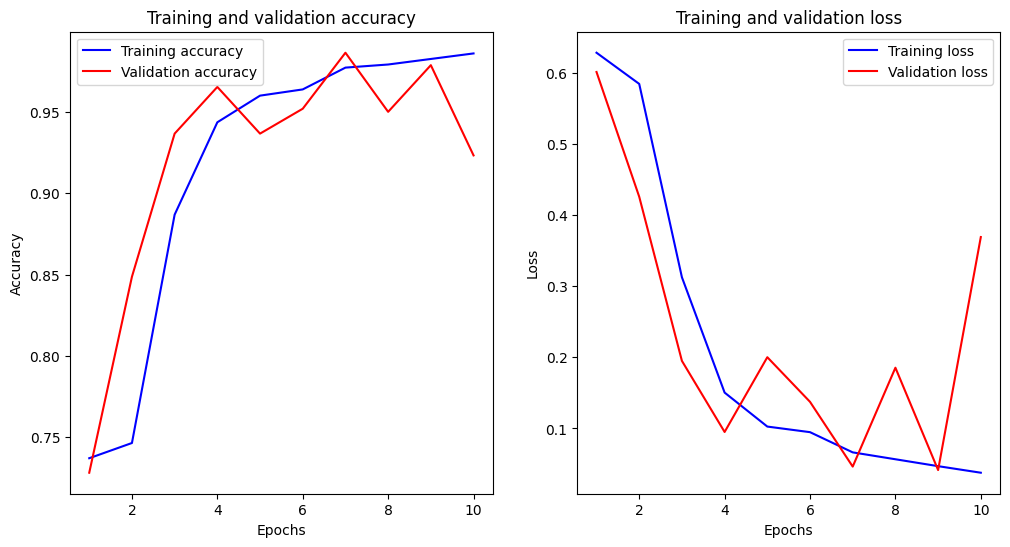

In [7]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
loss = History.history['loss']
val_loss = History.history['val_loss']


epochs = range(1, len(acc) + 1)


# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
X_val = []
y_val = []

for X, y in validation_data:
    X_val.append(X)
    y_val.append(y)
    


X_val = np.array(X_val).reshape(-1, img_size,img_size, 1)
X_val = X_val / 255.0
y_val = np.array(y_val)

Val_Eval = Model.evaluate(X_val, y_val, batch_size = 32)
Val_Eval

2024-06-04 10:09:27.772250: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.39848, expected 1.01693

2024-06-04 10:09:27.772335: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.61071, expected 1.22915

2024-06-04 10:09:27.772345: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.68362, expected 1.30207

2024-06-04 10:09:27.772353: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.92843, expected 1.54688

2024-06-04 10:09:27.772362: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 1.3426, expected 0.961047

2024-06-04 10:09:27.772369: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.14728, expected 1.76573

2024-06-04 10:09:27.772377: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.05027, expected 1.66872

2024-06-04 10:09:27.772384: E external/local_xla

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 4.5762


[4.576225757598877, 0.625]

In [9]:
X_test = []
y_test = []

for X, y in testing_data:
    X_test.append(X)
    y_test.append(y)
    


X_test = np.array(X_test).reshape(-1, img_size,img_size, 1)
X_test = X_test / 255.0
y_test = np.array(y_test)

Test_Eval = Model.evaluate(X_test, y_test, batch_size = 32)
Test_Eval

2024-06-04 10:09:29.730207: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.91263, expected 1.50699

2024-06-04 10:09:29.730265: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.81141, expected 2.40577

2024-06-04 10:09:29.730274: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.48353, expected 2.07789

2024-06-04 10:09:29.730282: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.56582, expected 2.16018

2024-06-04 10:09:29.730289: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.03728, expected 2.63165

2024-06-04 10:09:29.730297: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.92892, expected 2.52328

2024-06-04 10:09:29.730305: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 2.90039, expected 2.49475

2024-06-04 10:09:29.730312: E external/local_xla

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9033 - loss: 1.0961    


[3.803788423538208, 0.6714743375778198]

In [10]:
from sklearn.metrics import mean_squared_error
# sklearn.metrics.mean_squared_error
y_pred_test = Model.predict(X_test)
y_pred_val = Model.predict(X_val)

MSE_val = mean_squared_error(y_val, y_pred_val)
MSE_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error")
print("Validation Set: ", MSE_val, "Testing Set: ", MSE_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Mean Squared Error

Validation Set:  0.37485412267281076 Testing Set:  0.3122158784946455
